In [1]:
import pandas as pd
df_raw = pd.read_excel('11data.xlsx', sheet_name = 0)

In [2]:
import pandas as pd
df_raw_GPA = pd.read_excel('11data.xlsx', sheet_name = 1)

In [3]:
#GPA에서 학기별 평점만 가져옴
df_GPA = df_raw_GPA[['가번호', '2015_1_학기평점', '2015_2_학기평점', '2016_1_학기평점', '2016_2_학기평점', '2017_1_학기평점',
                     '2017_2_학기평점', '2018_1_학기평점', '2018_2_학기평점', '2019_1_학기평점', '2019_2_학기평점', '2020_1_학기평점']]
df_GPA

,가번호,2015_1_학기평점,2015_2_학기평점,2016_1_학기평점,2016_2_학기평점,2017_1_학기평점,2017_2_학기평점,2018_1_학기평점,2018_2_학기평점,2019_1_학기평점,2019_2_학기평점,2020_1_학기평점
0,20154001,2.87,1.80,2.10,1.38,0.00,0.85,0.00,0.0,0.00,2.35,0.00
1,20154002,2.93,2.62,2.62,3.10,0.00,0.00,0.00,0.0,0.00,3.85,4.27
2,20154003,3.76,4.15,3.50,3.35,3.82,4.00,4.33,0.0,4.50,4.50,0.00
3,20154004,3.68,3.44,3.52,3.05,4.00,3.78,0.00,0.0,3.58,0.00,NaN
4,20154005,4.31,4.08,4.14,4.29,0.00,0.00,0.00,0.0,0.00,4.29,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
19951,20207374,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
19952,20207375,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.18
19953,20207376,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3.66
19954,20207377,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.78


In [4]:
df_GPA = df_GPA.fillna(0) #--> 결측치 확인하는 부분 (없어도 무방)

In [5]:
from tqdm import tqdm
lst = []
count = 0
for i in range(len(df_GPA['가번호'])):
  temp_lst = []
  for j in range(len(df_GPA.iloc[i])):
    #학점이 0인 부분은 '정상적이지 않은 학기'로 판단 나중에 건너뛰기 위해서 0,0을 넣어줌
    if df_GPA.iloc[i][j] == 0:
      temp_lst.append([0, 0])
      continue
    #학점이 0이 아닌 부분은 정상적인 학기로 판단, 학기(count)와 학점 정보를 저장
    temp_lst.append([count , df_GPA.iloc[i][j]])
    count = count + 1
  lst.append(temp_lst)
  temp_lst = []
  count = 0

In [6]:
#실제로 데이터가 어떻게 저장되는지 확인하는 부분
count_1 = 0
for i in range(len(lst)):
  if count_1 == 10:
    break
  count_1 += 1
  print(lst[i])

[[0, 20154001.0], [1, 2.87], [2, 1.8], [3, 2.1], [4, 1.38], [0, 0], [5, 0.85], [0, 0], [0, 0], [0, 0], [6, 2.35], [0, 0]]
[[0, 20154002.0], [1, 2.93], [2, 2.62], [3, 2.62], [4, 3.1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [5, 3.85], [6, 4.27]]
[[0, 20154003.0], [1, 3.76], [2, 4.15], [3, 3.5], [4, 3.35], [5, 3.82], [6, 4.0], [7, 4.33], [0, 0], [8, 4.5], [9, 4.5], [0, 0]]
[[0, 20154004.0], [1, 3.68], [2, 3.44], [3, 3.52], [4, 3.05], [5, 4.0], [6, 3.78], [0, 0], [0, 0], [7, 3.58], [0, 0], [0, 0]]
[[0, 20154005.0], [1, 4.31], [2, 4.08], [3, 4.14], [4, 4.29], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [5, 4.29], [6, 4.5]]
[[0, 20154006.0], [1, 1.1], [2, 2.5], [3, 2.59], [4, 3.06], [5, 2.5], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, 20154007.0], [1, 3.46], [2, 2.93], [3, 3.35], [4, 3.31], [5, 3.23], [6, 3.14], [7, 2.59], [0, 0], [0, 0], [8, 3.2], [0, 0]]
[[0, 20154008.0], [1, 4.15], [2, 4.11], [0, 0], [3, 3.97], [4, 4.05], [5, 4.0], [0, 0], [0, 0], [0, 0], [6, 4.5], [7, 4.5]]
[[0, 2

In [7]:
#표준화 하는 부분 (1,2학기 3,4학기, 5,6학기, 7,8 학기 표준화)
import numpy as np
mean_lst = []
temp_1, temp_2, temp_3, temp_4 = [], [], [], []
for i in range(1, 12, 2):
  for j in range(len(lst)):
    total = lst[j][i]
    num = total[0]
    GPA = total[1]
    if num == 1 or num == 2:
      temp_1.append(GPA)
    elif num == 3 or num == 4:
      temp_2.append(GPA)
    elif num == 5 or num == 6:
      temp_3.append(GPA)
    elif num == 7 or num == 8:
      temp_4.append(GPA)
  temp_1, temp_2, temp_3, temp_4 = np.array((temp_1)), np.array((temp_2)), np.array((temp_3)), np.array((temp_4))
  temp_1_mean, temp_1_std = np.mean(temp_1), np.std(temp_1)
  temp_2_mean, temp_2_std = np.mean(temp_2), np.std(temp_2)
  temp_3_mean, temp_3_std = np.mean(temp_3), np.std(temp_3)
  temp_4_mean, temp_4_std = np.mean(temp_4), np.std(temp_4)
  mean_lst.append([temp_1_mean, temp_2_mean, temp_3_mean, temp_4_mean])
  for j in range(len(lst)):
    total = lst[j][i]
    num = total[0]
    GPA = total[1]
    if num == 1 or num == 2:
      lst[j][i] = [num, (GPA-temp_1_mean)/temp_1_std]
    if num == 3 or num == 4:
      lst[j][i] = [num, (GPA-temp_2_mean)/temp_2_std]
    if num == 5 or num == 6:
      lst[j][i] = [num, (GPA-temp_3_mean)/temp_3_std]
    if num == 7 or num == 8:
      lst[j][i] = [num, (GPA-temp_4_mean)/temp_4_std]
  temp_1, temp_2, temp_3, temp_4 = [], [], [], []

/Users/leeyeongeun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/leeyeongeun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/leeyeongeun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/leeyeongeun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/leeyeongeun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
#표준화 2,3학기, 4,5학기, 6,7,8학기 표준화
import numpy as np
mean_lst = []
temp_1, temp_2, temp_3, temp_4 = [], [], [], []
for i in tqdm(range(2, 12, 2)):
  for j in range(len(lst)):
    total = lst[j][i]
    num = total[0]
    GPA = total[1]
    if num == 1:
      temp_1.append(GPA)
    elif num == 2 or num == 3:
      temp_2.append(GPA)
    elif num == 4 or num == 5:
      temp_3.append(GPA)
    elif num == 6 or num == 7 or num == 8:
      temp_4.append(GPA)
  temp_1, temp_2, temp_3, temp_4 = np.array((temp_1)), np.array((temp_2)), np.array((temp_3)), np.array((temp_4))
  temp_1_mean, temp_1_std = np.mean(temp_1), np.std(temp_1)
  temp_2_mean, temp_2_std = np.mean(temp_2), np.std(temp_2)
  temp_3_mean, temp_3_std = np.mean(temp_3), np.std(temp_3)
  temp_4_mean, temp_4_std = np.mean(temp_4), np.std(temp_4)
  mean_lst.append([temp_1_mean, temp_2_mean, temp_3_mean, temp_4_mean])
  for j in range(len(lst)):
    total = lst[j][i]
    num = total[0]
    GPA = total[1]
    if num == 1:
      lst[j][i] = [num, (GPA-temp_1_mean)/temp_1_std]
    if num == 2 or num == 3:
      lst[j][i] = [num, (GPA-temp_2_mean)/temp_2_std]
    if num == 4 or num == 5:
      lst[j][i] = [num, (GPA-temp_3_mean)/temp_3_std]
    if num == 6 or num == 7 or num == 8:
      lst[j][i] = [num, (GPA-temp_4_mean)/temp_4_std]
  temp_1, temp_2, temp_3, temp_4 = [], [], [], []

100%|██████████| 5/5 [00:00<00:00, 27.88it/s]


In [9]:
#표준화된 성적이 어떻게 저장 되는지 확인하는 부분
print(lst[0])
print(lst[10001])

[[0, 20154001.0], [1, -0.29453999077060267], [2, -1.9416914330500097], [3, -1.6827955198898081], [4, -2.9225064228934583], [0, 0], [5, -3.6957829408967644], [0, 0], [0, 0], [0, 0], [6, -1.7999084849979257], [0, 0]]
[[0, 20184117.0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0.7292802557122214], [2, 1.5120363517569624], [3, 1.3447915557608625], [0, 0], [4, 0.4829031229061724]]


In [10]:
#1~8학기까지의 성적만 저장한다. 성적은 아까 COUNT로 확인할 수 있고(이 경우에 COUNT가 num으로 변한다) 성적은 GPA에 저장한다.
final = []
temp = []
for i in range(len(lst)):
  for j in range(len(lst[i])):
    total = lst[i][j]
    num = total[0]
    GPA = total[1]
    if j == 0:
      temp.append(int(GPA))
    else:
      #NUM = 아까 COUNT로 저장한 부분, COUNT가 1~8인 경우에만 성적을 저장
      if num == 1 or num == 2 or num == 3 or num == 4 or num == 5 or num == 6 or num == 7 or num == 8:
        temp.append(round(GPA,2))
  final.append(temp)
  temp = []

In [11]:
#여기 부분은 성적이 8학기인 학생만 저장하는 부분(학점 포함해서 길이가 9이상이어야 함)
x = []
for i in final:
  if len(i) >= 9:
    x.append(i)

In [12]:
#X가 어떻게 저장되는지 보여주는 부분
x[0]

[20154003, 0.86, 1.31, 0.36, 0.03, 0.63, 0.77, 1.14, 1.43]

In [13]:
#x를 데이터프레임으로 저장
x_pd = pd.DataFrame(x)

In [14]:
x_pd

,0,1,2,3,4,5,6,7,8
0,20154003,0.86,1.31,0.36,0.03,0.63,0.77,1.14,1.43
1,20154007,0.47,-0.38,0.14,-0.03,-0.28,-0.58,-1.52,-0.53
2,20154015,0.63,-0.32,-0.21,-0.28,-1.66,0.25,0.34,-0.34
3,20154016,0.89,0.50,0.99,0.86,1.10,1.02,0.76,0.39
4,20154018,0.20,1.06,-0.56,-0.04,-0.19,-0.87,-0.44,0.08
...,...,...,...,...,...,...,...,...,...
1726,20167293,1.63,0.97,0.64,0.45,0.38,-0.31,-0.89,-1.73
1727,20167294,-0.45,0.01,-0.53,-0.81,-2.06,-0.69,-1.35,-1.86
1728,20167295,1.16,-0.12,-0.09,-0.11,-0.91,-0.79,0.23,-1.58
1729,20167296,0.48,0.08,0.36,-0.12,-0.50,0.58,0.13,-0.53


In [15]:
#x에서 학번 날리기 (클러스팅 하기 위해)
for i in range(len(x)):
  x[i] = x[i][1:]

In [16]:
#총 학생수, 클러스터링 위해 넘파이 배열로 변경
print(len(x))
x = np.array(x)
x

1731


array([[ 0.86,  1.31,  0.36, ...,  0.77,  1.14,  1.43],
       [ 0.47, -0.38,  0.14, ..., -0.58, -1.52, -0.53],
       [ 0.63, -0.32, -0.21, ...,  0.25,  0.34, -0.34],
       ...,
       [ 1.16, -0.12, -0.09, ..., -0.79,  0.23, -1.58],
       [ 0.48,  0.08,  0.36, ...,  0.58,  0.13, -0.53],
       [ 1.39,  1.67,  0.88, ...,  0.36,  0.06, -0.49]])

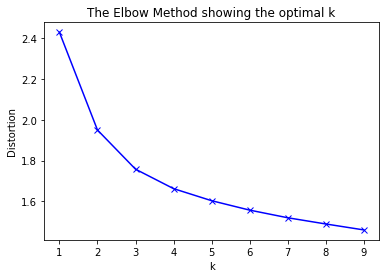

In [17]:
#엘보
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
km = KMeans(n_clusters=5, random_state=0) #랜덤스테이트 0으로 두는게 중요 이거 바뀌면 값 바뀜, 클러스터 개수는 5개
y_km = km.fit_predict(x)

In [19]:
print(y_km) #예측 확인, Y_KM에는 클러스터 값이 들어가 있음

[2 3 4 ... 3 0 2]


In [ ]:
#여기부터는 학기별 학점 평균 구하는 부분

In [20]:
x_pd['category'] = y_km #x_pd에 카테고리 추가(여기는 학점 안날라가 있음, x에는 학점 삭제, x_pd는 삭제 안되어 있음)
x_pd

,0,1,2,3,4,5,6,7,8,category
0,20154003,0.86,1.31,0.36,0.03,0.63,0.77,1.14,1.43,2
1,20154007,0.47,-0.38,0.14,-0.03,-0.28,-0.58,-1.52,-0.53,3
2,20154015,0.63,-0.32,-0.21,-0.28,-1.66,0.25,0.34,-0.34,4
3,20154016,0.89,0.50,0.99,0.86,1.10,1.02,0.76,0.39,2
4,20154018,0.20,1.06,-0.56,-0.04,-0.19,-0.87,-0.44,0.08,3
...,...,...,...,...,...,...,...,...,...,...
1726,20167293,1.63,0.97,0.64,0.45,0.38,-0.31,-0.89,-1.73,3
1727,20167294,-0.45,0.01,-0.53,-0.81,-2.06,-0.69,-1.35,-1.86,1
1728,20167295,1.16,-0.12,-0.09,-0.11,-0.91,-0.79,0.23,-1.58,3
1729,20167296,0.48,0.08,0.36,-0.12,-0.50,0.58,0.13,-0.53,0


In [46]:
x_pd['category'] = x_pd['category'].replace([2, 0, 4, 3, 1], ['유형1', '유형2', '유형3', '유형4', '유형5'])
x_pd.rename(columns = {"category":"유형"}, inplace=True)

In [47]:
x_pd

,0,1,2,3,4,5,6,7,8,유형
0,20154003,0.86,1.31,0.36,0.03,0.63,0.77,1.14,1.43,유형1
1,20154007,0.47,-0.38,0.14,-0.03,-0.28,-0.58,-1.52,-0.53,유형4
2,20154015,0.63,-0.32,-0.21,-0.28,-1.66,0.25,0.34,-0.34,유형3
3,20154016,0.89,0.50,0.99,0.86,1.10,1.02,0.76,0.39,유형1
4,20154018,0.20,1.06,-0.56,-0.04,-0.19,-0.87,-0.44,0.08,유형4
...,...,...,...,...,...,...,...,...,...,...
1726,20167293,1.63,0.97,0.64,0.45,0.38,-0.31,-0.89,-1.73,유형4
1727,20167294,-0.45,0.01,-0.53,-0.81,-2.06,-0.69,-1.35,-1.86,유형5
1728,20167295,1.16,-0.12,-0.09,-0.11,-0.91,-0.79,0.23,-1.58,유형4
1729,20167296,0.48,0.08,0.36,-0.12,-0.50,0.58,0.13,-0.53,유형2


In [48]:
#가번호를 드랍한 데이터 프레임 생성
#기본적인 분석을 하기 위해
#학점, 클러스터만 남는다
x_pd_drop_가번호 = x_pd.drop(x_pd.columns[[0]], axis='columns')
x_pd_drop_가번호

,1,2,3,4,5,6,7,8,유형
0,0.86,1.31,0.36,0.03,0.63,0.77,1.14,1.43,유형1
1,0.47,-0.38,0.14,-0.03,-0.28,-0.58,-1.52,-0.53,유형4
2,0.63,-0.32,-0.21,-0.28,-1.66,0.25,0.34,-0.34,유형3
3,0.89,0.50,0.99,0.86,1.10,1.02,0.76,0.39,유형1
4,0.20,1.06,-0.56,-0.04,-0.19,-0.87,-0.44,0.08,유형4
...,...,...,...,...,...,...,...,...,...
1726,1.63,0.97,0.64,0.45,0.38,-0.31,-0.89,-1.73,유형4
1727,-0.45,0.01,-0.53,-0.81,-2.06,-0.69,-1.35,-1.86,유형5
1728,1.16,-0.12,-0.09,-0.11,-0.91,-0.79,0.23,-1.58,유형4
1729,0.48,0.08,0.36,-0.12,-0.50,0.58,0.13,-0.53,유형2


In [49]:
#클러스터로 그룹바이 해서 평균 구하기
x_graph = x_pd_drop_가번호.groupby('유형').mean()
x_graph

,1,2,3,4,5,6,7,8
유형,,,,,,,,
유형1,0.947539,1.021839,1.039301,0.996036,0.967461,0.896839,0.811917,0.746088
유형2,0.158881,0.295056,0.280821,0.256847,0.259123,0.352071,0.384664,0.347575
유형3,-0.551947,-0.440825,-0.580726,-0.668977,-0.567030,-0.341056,-0.188449,0.045974
유형4,0.396774,0.247161,0.058000,-0.092516,-0.314452,-0.515097,-0.639548,-0.966516
유형5,-0.786122,-0.911071,-1.172908,-1.349745,-1.667245,-1.500867,-1.702347,-1.811633


In [43]:
x_graph.to_excel('graph_1.xlsx')

In [ ]:
#평균 그래프로 나타내기
#20431 순으로 좋음
#이거 그냥 엑셀로 그리는게 훨씬 나을듯
#plt.plot(x_pd_drop_가번호.groupby('category').mean().iloc[2], label = 'category 5')
#plt.plot(x_pd_drop_가번호.groupby('category').mean().iloc[0], label = 'category 4')
#plt.plot(x_pd_drop_가번호.groupby('category').mean().iloc[4], label = 'category 3')
#plt.plot(x_pd_drop_가번호.groupby('category').mean().iloc[3], label = 'category 2')
#plt.plot(x_pd_drop_가번호.groupby('category').mean().iloc[1], label = 'category 1')

#plt.legend()
#plt.show()

In [ ]:
#여기까지 학점 평균 구하기 끝

In [50]:
#x_pd는 가번호, 학기평균점수, 카테고리가 있는 데이터프레임
#학번과 카테고리만 남기고 없애기
#중요한건 클러스터니까 학점과 카테고리만 남김
#나중에 다른 데이터프레임과 merge
df_final = x_pd.drop(x_pd.columns[[1,2,3,4,5,6,7,8]], axis='columns')

df_final = df_final.rename({0 : '가번호'}, axis = 'columns')

print(df_final)

           가번호   유형
0     20154003  유형1
1     20154007  유형4
2     20154015  유형3
3     20154016  유형1
4     20154018  유형4
...        ...  ...
1726  20167293  유형4
1727  20167294  유형5
1728  20167295  유형4
1729  20167296  유형2
1730  20167297  유형1

[1731 rows x 2 columns]


In [51]:
#merge한다. df_raw는 성별, 전형 등등 들어가 있는 데이터프레임, df_final은 위에서 만든거
df_merge = pd.merge(df_raw, df_final, left_on='가번호', right_on='가번호', how='inner')

In [52]:
#category 나누지 않고, 입학년도에 따른 학생 수
result = df_merge[['가번호', '입학년도']].groupby(['입학년도']).agg(['count'])
result

,가번호
,count
입학년도,
2015,1129
2016,602


In [53]:
#category 나누지 않고, 수시 정시 수
result = df_merge[['가번호', '입학전형']].groupby(['입학전형']).agg(['count'])
result

,가번호
,count
입학전형,
수시,985
정시,746


In [ ]:
#이제 계열별, 전형별 학생 수를 구하기 위해 계열, 전형을 데이터프레임에 추가

In [54]:
계열_lst = []
count = 0
for i in range(len(df_merge['전형구분'])):
    if df_merge['입학대학'][i] == '문과대학':
        계열_lst.append('인문1')
    if df_merge['입학학과'][i] == '의상디자인학과-인문계' or df_merge['입학학과'][i] == '일어교육과' or df_merge['입학학과'][i] == '교육공학과' or df_merge['입학학과'][i] == '영어교육과' or df_merge['입학학과'][i] == '신산업융합학과' or df_merge['입학학과'][i] == '융합인재학과' or df_merge['입학학과'][i] == '글로벌비즈니스학과':
        계열_lst.append('인문1')
    if df_merge['입학대학'][i] == '경영대학':
        if df_merge['입학학과'][i] == '부동산학과':
            pass
        else:
            계열_lst.append('인문2')
    if df_merge['입학대학'][i] == '글로벌융합대학':
        if df_merge['입학학과'][i] == '신산업융합학과':
            pass
        else:
            계열_lst.append('인문1')
    if df_merge['입학학과'][i] == '정치외교학과' or df_merge['입학학과'][i] =='정치대학' or df_merge['입학학과'][i] =='상경대학'or df_merge['입학학과'][i] =='부동산학과' or df_merge['입학학과'][i] =='경제학과' or df_merge['입학학과'][i] == '행정학과' or df_merge['입학학과'][i] == '국제무역학과' or df_merge['입학학과'][i] == '응용통계학과':
        계열_lst.append('인문2')

    if df_merge['입학대학'][i] == '이과대학':
        계열_lst.append('자연1')
    if df_merge['입학대학'][i] == '소프트웨어융합학부' or df_merge['입학대학'][i] == '정보통신대학':
        계열_lst.append('자연1')
    if df_merge['입학대학'][i] == '공과대학':
        if df_merge['입학학과'][i] == '신산업융합학과':
            pass
        else:
            계열_lst.append('자연1')
    if df_merge['입학학과'][i] == '수학교육과' or df_merge['입학학과'][i] == '미래에너지공학과' or df_merge['입학학과'][i] == '스마트운행체공학과' or df_merge['입학학과'][i] == '스마트ICT융합공학과':

        계열_lst.append('자연1')
    if df_merge['입학대학'][i] == '건축대학' or df_merge['입학대학'][i] == '생명특성화대학' or df_merge['입학대학'][i] == '생명환경과학대학' or df_merge['입학대학'][i] == '동물생명과학대학':

        계열_lst.append('자연2')
    if df_merge['입학학과'][i] == '화장품공학과' or df_merge['입학학과'][i] == '줄기세포재생공학과' or df_merge['입학학과'][i] == '의생명공학과' or df_merge['입학학과'][i] == '시스템생명공학과' or df_merge['입학학과'][i] == '융합생명공학과' or df_merge['입학학과'][i] == '수의예과':

        계열_lst.append('자연2')
    if df_merge['입학대학'][i] == '상허생명과학대학':
        계열_lst.append('자연2')
    if df_merge['입학대학'][i] == '예술디자인대학':
        if df_merge['입학학과'][i] == '의상디자인학과-인문계':
            pass
        else:
            계열_lst.append('예체능')
    if df_merge['입학학과'][i] == '체육교육과' or '음악교육과' in df_merge['입학학과'][i]:
        계열_lst.append('예체능')
    if count > 1:
        print(df_merge['가번호'][i])
    count = 0
print(len(계열_lst))
#이 부분이 계열 추가하는 부분
df_merge['계열'] = 계열_lst

1731


In [55]:
전형구분_lst = []

for i in range(len(df_merge['전형구분'])):
    if '교과우수자' in df_merge['전형구분'][i]:
        전형구분_lst.append('KU교과우수자')
    elif '자기추천' in df_merge['전형구분'][i]:
        전형구분_lst.append('KU자기추천')
    elif '학교추천' in df_merge['전형구분'][i]:
        전형구분_lst.append('KU학교추천') 
    elif '논술우수자' in df_merge['전형구분'][i]:
        전형구분_lst.append('KU논술우수자')
    elif '일반학생전형' in df_merge['전형구분'][i]:
        전형구분_lst.append('수능')
    else:
        전형구분_lst.append('기타')
print(len(전형구분_lst))
#df_merge 
#이 부분이 전형 추가하는 부분
df_merge['전형'] = 전형구분_lst
#df_merge

1731


In [57]:
#category 나누고 입학전형에 따른 학생 수 (수시냐 정시냐)
result = df_merge[['가번호', '입학전형', '유형']].groupby(['입학전형', '유형']).agg(['count'])
result

가번호
         count
입학전형 유형       
수시   유형1   230
     유형2   314
     유형3   175
     유형4   153
     유형5   113
정시   유형1   156
     유형2   222
     유형3   128
     유형4   157
     유형5    83

In [61]:
result.to_excel('정시수시_유형.xlsx')

In [58]:
#계열별 얼마나 있냐
result = df_merge[['가번호', '계열', '유형']].groupby(['계열', '유형']).agg(['count'])
result

가번호
        count
계열  유형       
예체능 유형1    35
    유형2    62
    유형3    45
    유형4    80
    유형5    52
인문1 유형1   122
    유형2   121
    유형3    42
    유형4    69
    유형5    39
인문2 유형1    50
    유형2    83
    유형3    56
    유형4    29
    유형5    23
자연1 유형1    80
    유형2   128
    유형3    90
    유형4    52
    유형5    32
자연2 유형1    99
    유형2   142
    유형3    70
    유형4    80
    유형5    50

In [62]:
result.to_excel('계열_유형.xlsx')

In [59]:
#성별로 얼마냐 있냐
result = df_merge[['가번호', '성별', '유형']].groupby(['성별', '유형']).agg(['count'])
result

가번호
       count
성별 유형       
남  유형1    54
   유형2    80
   유형3    61
   유형4    90
   유형5    86
여  유형1   332
   유형2   456
   유형3   242
   유형4   220
   유형5   110

In [63]:
result.to_excel('성별_유형.xlsx')

In [60]:
#전형별로 얼마냐 있냐
result = df_merge[['가번호', '전형', '유형']].groupby(['전형', '유형']).agg(['count'])
result

가번호
            count
전형      유형       
KU교과우수자 유형1    40
        유형2    30
        유형3     6
        유형4    10
        유형5     2
KU논술우수자 유형1    41
        유형2    88
        유형3    65
        유형4    40
        유형5    23
KU자기추천  유형1    88
        유형2   118
        유형3    58
        유형4    43
        유형5    19
기타      유형1    65
        유형2    79
        유형3    47
        유형4    62
        유형5    72
수능      유형1   152
        유형2   221
        유형3   127
        유형4   155
        유형5    80

In [ ]:
result.to_excel('정시수시_유형.xlsx')